In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os
import json
import pandas as pd
from src.utils.GAM_testing_utility import *

In [2]:
root_path = './output/GANs/'
classes = np.load(root_path + 'classes.npy')

model_class_acc = np.load(root_path + 'model_class_acc.npy')
model_pred = np.load(root_path + 'model_predictions.npy')

train_idx = np.load(root_path + 'train_index.npy')
test_idx = np.load(root_path + 'test_index.npy')
val_idx = np.load(root_path + 'val_index.npy')

# only get directories
model_names = [ f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f)) ]
model_names.sort() 


model_df = pd.DataFrame(np.array(model_names), columns=['model'])
pd.set_option('display.max_columns', None)
model_df

model
0  name

In [3]:
selected_model = 0


# 'all', 'train', 'test', 'val
data_subset = 'test'

In [4]:
name = model_names[selected_model]
model_path = root_path + name + '/' + name

with open(model_path + '_config.json') as json_file: 
    config = json.load(json_file)

generator, encoder, model, dataloader = setup_nets(model_path, config)
latent_aug = get_aug_function(config['latent_aug_name'])

if not os.path.exists(model_path + '_latent.npy'):
    pred, latents = calc_preds_latents(generator, encoder, model, dataloader, latent_aug)
    np.save(model_path + '_pred.npy', pred.numpy())
    np.save(model_path + '_latent.npy', latents.numpy())

latents = np.load(model_path + '_latent.npy')
pred = np.load(model_path + '_pred.npy')

if not os.path.exists(model_path + '_mean_std.npy'):
    mean_latent = np.mean(latents, 0)
    std_latent = np.mean(latents, 0)
    np.save(model_path + '_mean_std.npy', np.vstack([mean_latent,std_latent]))
mean_std = np.load(model_path + '_mean_std.npy')

In [5]:
class_latents, class_pred, class_correct = separate(classes, pred, latents)

In [6]:
classes_sub, pred_sub, latents_sub = use_dataset(data_subset, train_idx, test_idx, val_idx, classes, pred, latents)
class_acc = calc_class_acc(classes_sub, pred_sub)
class_rank = np.argsort(class_acc)

# Testing

In [7]:
print(f'mean accuracy of subset {data_subset} : {np.mean(class_acc)}')

mean accuracy of subset test : 0.005076142131979695


In [8]:
rank_data = np.vstack((class_rank.astype(np.int64), class_acc[class_rank]))
rank_df = pd.DataFrame(rank_data, index=['class', 'acc'])
pd.set_option('display.max_columns', None)
rank_df

0      1      2      3      4      5      6      7      8      9    \
class  0.0  125.0  126.0  127.0  128.0  129.0  130.0  131.0  132.0  133.0   
acc    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         10     11     12     13     14     15     16     17     18     19   \
class  124.0  134.0  136.0  137.0  138.0  139.0  140.0  141.0  142.0  143.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         20     21     22     23     24     25     26     27     28     29   \
class  144.0  135.0  123.0  122.0  121.0  100.0  101.0  102.0  103.0  104.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         30     31     32     33     34     35     36     37     38     39   \
class  105.0  106.0  107.0  108.0  109.0  110.0  111.0  112.0  113.0  114.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         40     41     42     43     44     45     46     47     48     49   \
class  115.0  116.0  117.0  118.0  119.0  120.0  145.0  146.0  147.0  148.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         50     51     52     53     54     55     56     57     58     59   \
class  174.0  175.0  176.0  177.0  178.0  179.0  180.0  181.0  182.0  183.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         60     61     62     63     64     65     66     67     68     69   \
class  184.0  185.0  186.0  187.0  188.0  189.0  190.0  191.0  192.0  193.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         70     71    72     73     74     75     76     77     78     79   \
class  194.0  173.0  99.0  172.0  170.0  149.0  150.0  151.0  152.0  153.0   
acc      0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         80     81     82     83     84     85     86     87     88     89   \
class  154.0  155.0  156.0  157.0  158.0  159.0  160.0  161.0  162.0  163.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         90     91     92     93     94     95     96     97    98    99   \
class  164.0  165.0  166.0  167.0  168.0  169.0  171.0  195.0  98.0  96.0   
acc      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0   0.0   

        100   101   102   103   104   105   106   107   108   109   110   111  \
class  26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0  25.0  35.0  37.0   
acc     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

        112   113   114   115   116   117   118   119   120   121   122   123  \
class  38.0  39.0  40.0  41.0  42.0  43.0  44.0  45.0  36.0  24.0  23.0  22.0   
acc     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       124  125  126  127  128  129  130  131  132   133   134   135   136  \
class  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  11.0  12.0  13.0   
acc    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   

        137   138   139   140   141   142   143   144   145   146    147  \
class  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  46.0  47.0  196.0   
acc     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        148   149   150   151   152   153   154   155   156   157   158   159  \
class  49.0  75.0  76.0  77.0  78.0  79.0  80.0  81.0  82.0  83.0  84.0  85.0   
acc     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

        160   161   162   163   164   165   166   167   168   169   170   171  \
class  86.0  87.0  88.0  89.0  90.0  91.0  92.0  93.0  94.0  95.0  74.0  97.0   
acc     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

        172   173   174   175   176   177   178   179   180   181   182   183  \
class  73.0  71.0  50.0  51.0  52.0  53.0  54.0  55.0  56.0  57.0  58.0  59.0   
acc     0.0   0.0   0.0   0.0   0.0   0.

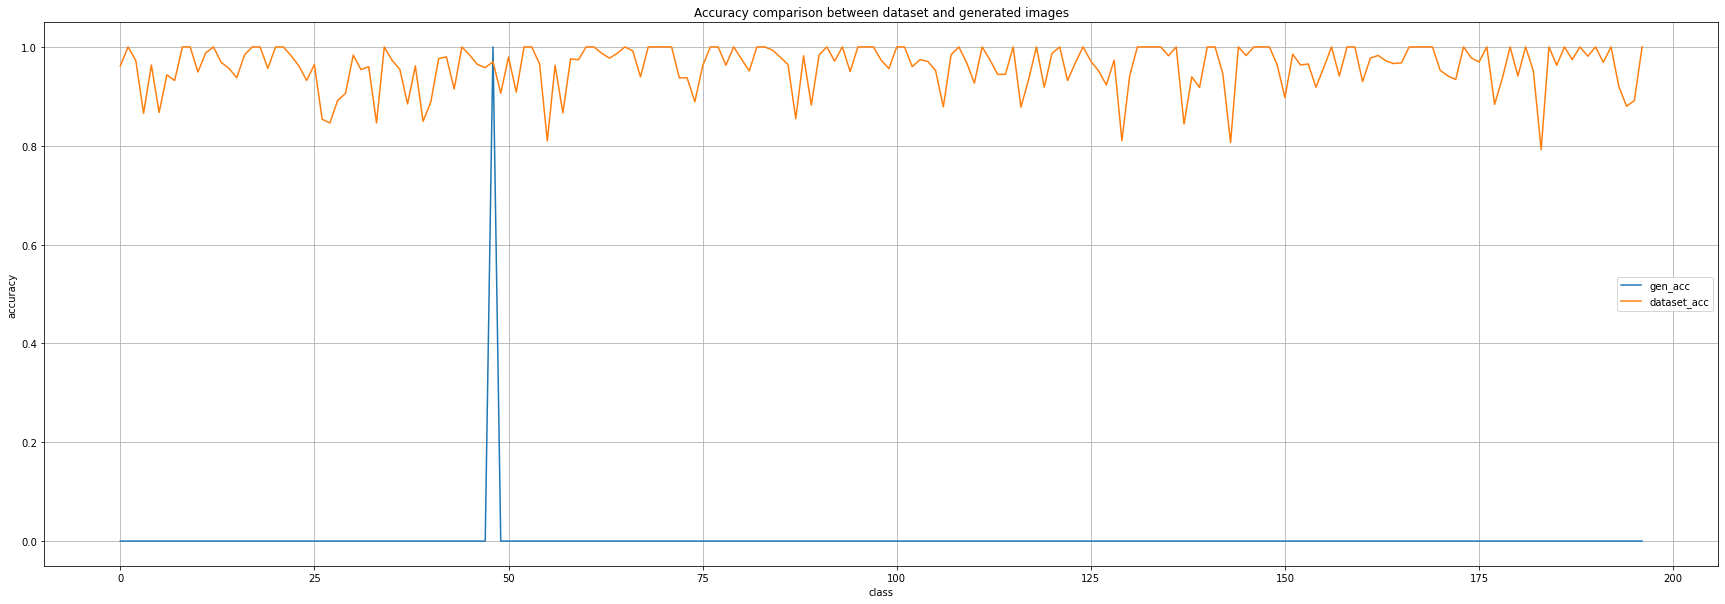

In [9]:
acc_vs_model(class_acc, model_class_acc, False)

Text(0.5, 1.0, 'Confusion matrix')

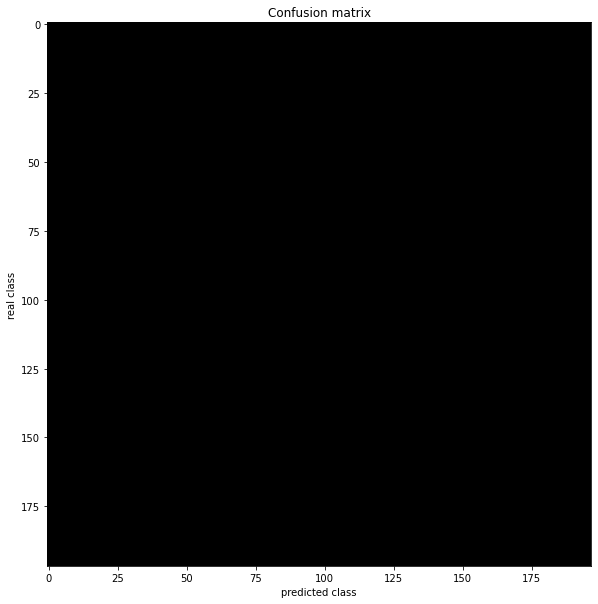

In [10]:
con_matrix = confusion_matrix(class_pred)

fig, ax = plt.subplots(1,1,figsize=(10,10))
fig.set_facecolor('white')
ax.imshow(con_matrix, cmap='gray')
ax.set_ylabel('real class')
ax.set_xlabel('predicted class')
ax.set_title('Confusion matrix')


/home/thorreign/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[48 48 48 48 48]


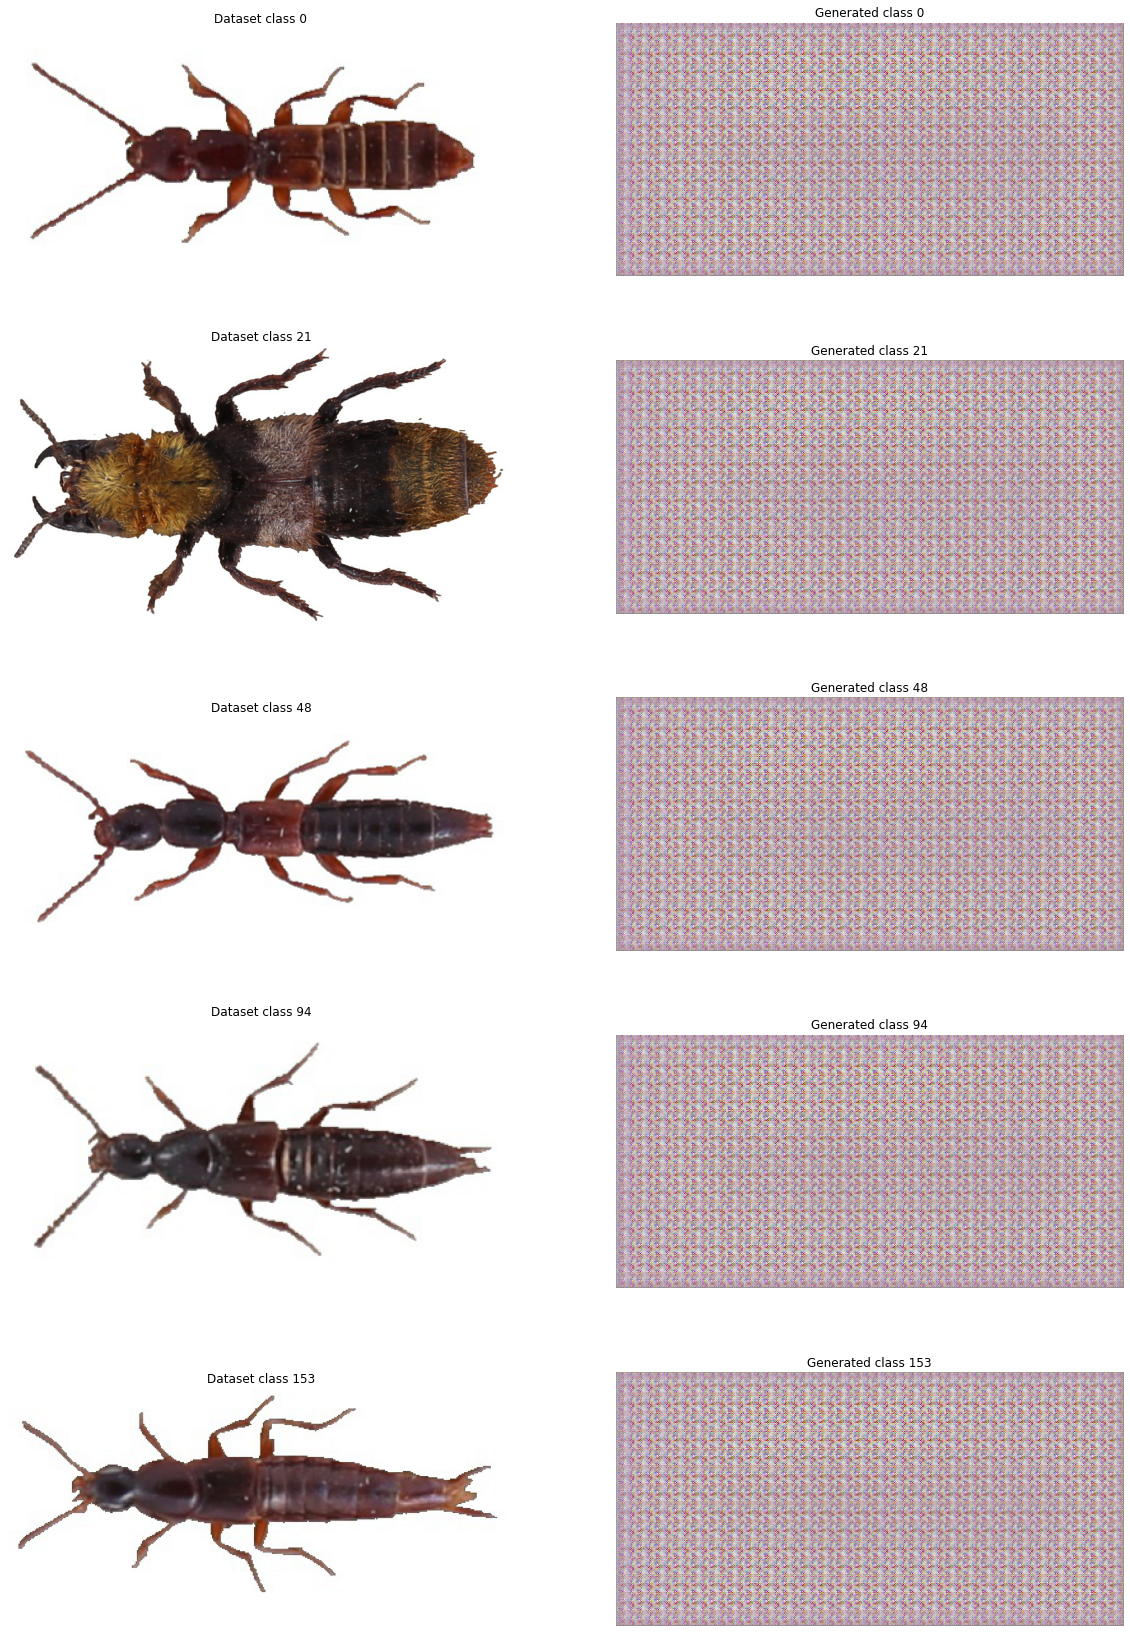

In [11]:
visual_insection(generator, encoder, model)

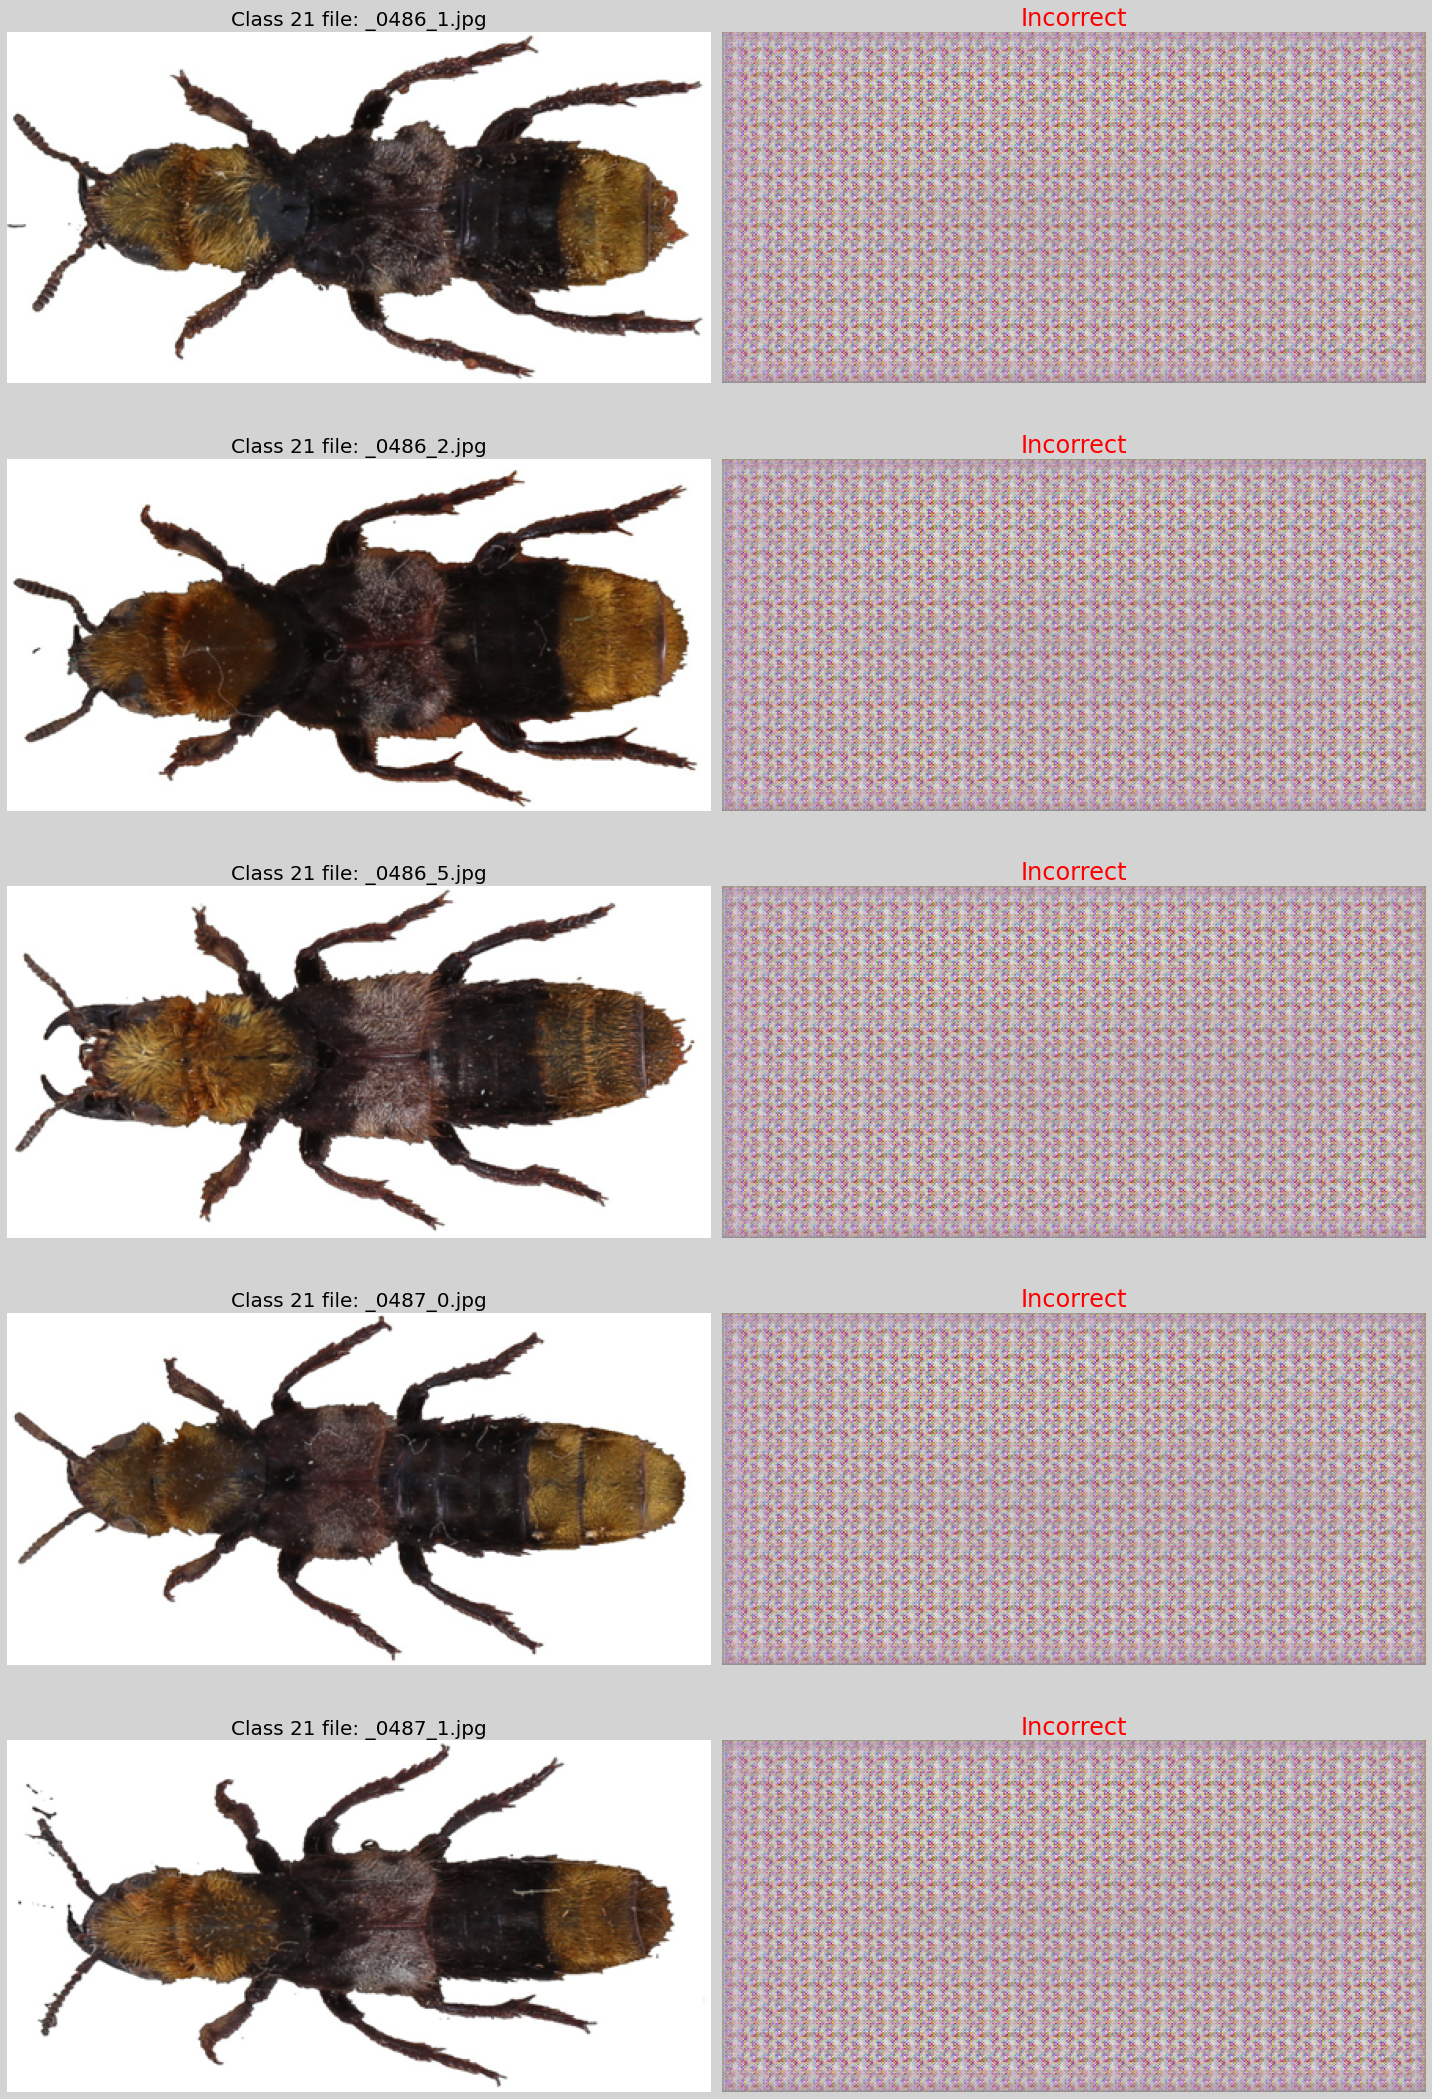

In [12]:
show_class(class_latents, class_pred, 21, 0, generator)